<a href="https://colab.research.google.com/github/hansquiogue/colabr/blob/main/colabr_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing colabr

`Colabr` is a simple R package to make working with Google Colab a lot smoother and fix issues that occur with various packages. Before we can install the package, we need to install `devtools`, since `colabr` is hosted on GitHub. 

In [ ]:
# Install devtools
install.packages('devtools')

We can install the package like so:

In [ ]:
# Install colabr
devtools::install_github('hansquiogue/colabr', force = TRUE)

In [ ]:
# Load colabr package
library(colabr)

# Alerts

You can call a function to help generate alerts for your colab notebook using `generate_alerts()`.

It takes in three optional arguments:
- Embedded: Whether or not the output is an embedded webpage
- Width: The width of the embedded output
- Height: The height of the embedded output



In [ ]:
generate_alerts()

Bug note: sometimes the embedded webpage does not display. You may see `embedded` to FALSE to view the actual website instead.

In [ ]:
# If embedded does not show up, view the website instead
generate_alerts(embedded = FALSE)

Here is an example of the default alert in action:

<img src="https://i.imgur.com/vGhxj4A.png" alt="alert" width="50" height="50">
<br><font size="+1" face="Arial" color="red" id="preview">Alert message goes here!</font>

Run the code below to view the documentation:

In [ ]:
# Documentation
?generate_alerts

# Downloading Files from Google Drive

We can download files from a Google Drive using `download_drive`. It takes in one argument:
- drive_link: a string of a publicly shared drive folder or single file.

The files are assumed to be publicly shared for anyone to view. 



<img src="https://i.imgur.com/vGhxj4A.png" alt="alert" width="50" height="50">
<br><font size="+1" face="Arial" color="Red" id="preview">For folder downloads, ensure there are no subdirectories!</font>

The code currently cannot handle Google Drive folder downloads with subdirectories inside them.

In [ ]:
?download_drive

Let's download a file:

In [ ]:
download_drive('https://drive.google.com/file/d/1S5Qzc9mnWEjjYR1P7p2QhOfUAcftijGd/view?usp=sharing')

We can check that the file is downloaded by clicking the folder icon in the left side of Google Colab:

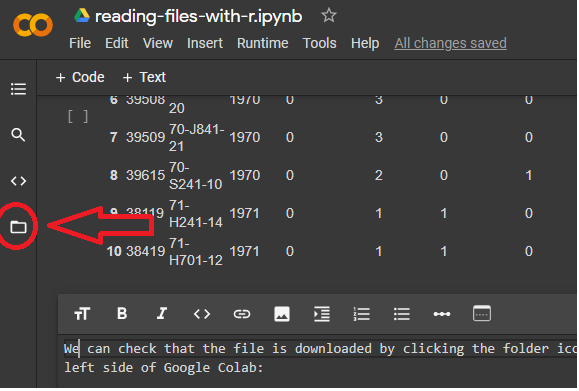

If the file hasn't shown up, wait a couple seconds or refresh the Files tab. If it still hasn't shown up after a while, please double check to see if the file has the correct sharing permissions and is publicly available.

We can also download a folder (remember, no sub-folders inside the main folder!).

The files in the folder will be downloaded:

In [ ]:
download_drive('https://drive.google.com/drive/folders/1FijtsIRgQpDOlt4ZdTbaA7gPoqmuJaqA?usp=sharing')

Like before, you can check what files are downloaded by clicking the folder in the left menu.

We can read in files after downloading what we need:

In [ ]:
scdb <- read.csv('scdb.csv')

head(scdb, 4)

# spacyr and cleanNLP Initializations

Initializing spacyr and cleanNLP can be a bit annoying in Google Colab. This package will make the process simpler using a couple lines of code.

## Anaconda

Before initializing the packages, we'll need to download and install Anaconda. You can do so using `download_anaconda()`.

In [ ]:
?download_anaconda()

Let's setup Anaconda. Running the function downloads and installs Anaconda into Google Colab, so the process might take a while. 

<img src="https://i.imgur.com/vGhxj4A.png" alt="alert" width="50" height="50">
<br><font size="+1" face="Arial" color="Red" id="preview">Note that the notebook runtime is also restarted after running this function. </font>

*Don't worry if Colab says the session crashed; it is done on purpose!*

In [ ]:
# Download anaconda (might take a while)
# Don't worry if session crashed, notebook is restarted
download_anaconda()

Whenever we use the function though, we'll need to load the libraries we've used in this notebook. We don't need to install everything again though! Let's load back the colabr package (since it's the only one we've used):

In [ ]:
library(colabr)

We can setup our Anaconda environment now using `setup_anaconda()`. It takes in one argument, a string that represents what we want to call the environment variable. By default, it is `r-reticulate`. You may view the documentation below. 

It takes in one optional argument:
- env: The conda environment variable name. The default value is 'r-reticulate'.

In [ ]:
?setup_anaconda()

Let's setup our Anaconda environment:

In [ ]:
setup_anaconda()

After running the code chunk, we should be all set with running spacyr and cleanNLP

## spacyr

Now that we have Anaconda setup, we can setup spacyr using `setup_spacyr()`. It takes in two arguments:
- env: The condo environment name. The default is 'r-reticulate'.
- lang_models: The language package for loading spaCy. The default is 'en_core_web_sm' or English.

In [ ]:
# Documentation
?setup_spacyr

Before we can use the function though, we'll need to install the spacyr package:

In [ ]:
# Remeber to install package prior to using setup_spacyr
install.packages('spacyr')

In [ ]:
library(spacyr)

Once that's done, we can use `setup_spacyr()`. It takes in twos argument; like before it is a string for the conda environment and by default it is `r-reticulate`. The other argument is what default language model to download and by the default it is English:


In [ ]:
# Setup spacyr
setup_spacyr()

Once spacyr is setup, the package should work properly now! You may download addition language models using `spacy_download_langmodel()` but that is optional. Here's an example of that package working:

In [ ]:
txt <- c(d1 = "spaCy is great at fast natural language processing.",
         d2 = "Mr. Smith spent two years in North Carolina.")

# process documents and obtain a data.table
parsedtxt <- spacy_parse(txt)
parsedtxt

## cleanNLP

Like before, we'll need to setup Anaconda before we can use cleanNLP. Once that's done though, we can setup the package using `setup_cleanNLP()`. It takes in one argument:
- env: The condo environment name. The default is r-reticulate.

In [ ]:
# documentation
?setup_cleanNLP

It only takes in one argument: the conda environment. By default it it `r-reticulate`. Like before, we'll need to install cleanNLP first and load it in. This time, we'll need to have spacyr installed as well but we've already done that from before:

In [ ]:
install.packages('cleanNLP')

In [ ]:
library(cleanNLP)

Lets setup the package:

In [ ]:
# Setup cleanNLP (make sure you have installed cleanNLP and spacyr prior to this)
setup_cleanNLP()

Once done, the Colab issues with the package should be fixed! We can set up everything up such as downloading the models and languages:

In [ ]:
# Installs spacy and coreNLP backend models
cnlp_download_spacy("en")
cnlp_download_corenlp(lang="en") 

And initializing desired backends and models:

In [ ]:
# Initialize models
cnlp_init_stringi(locale="en_GB")
cnlp_init_udpipe(model_name="english")

# Spacy backend (will not need to run if initialized in spacyr)
# cnlp_init_spacy(model_name="en")

# CoreNLP backend
cnlp_init_corenlp(lang="en")

Here's an example in action:

In [ ]:
cnlp_init_udpipe()

annotation <- cnlp_annotate(input = c(
        "Here is the first text. It is short.",
        "Here's the second. It is short too!",
        "The third text is the shortest."
))

lapply(annotation, head)

# text2vec LDA Plots

Interactive LDA plots from text2vec do not work properly in Google Colab. `colabr` fixes that. Let's use the built in example from the package and create and fit a model first. First, let's install the package:

In [ ]:
install.packages('text2vec')

And load the library:

In [ ]:
library(text2vec)

And the required dependencies:

In [ ]:
install.packages('servr')
install.packages('LDAvis')

library(servr)
library(LDAvis)

Let's load in the movie review dataset:

In [ ]:
data('movie_review')

Perform some pre-processing and create and fit an LDA model:

In [ ]:
tokens = tolower(movie_review$review[1:4000])
tokens = word_tokenizer(tokens)
it = itoken(tokens, ids = movie_review$id[1:4000], progressbar = FALSE)
v = create_vocabulary(it)
v = prune_vocabulary(v, term_count_min = 10, doc_proportion_max = 0.2)
  
vectorizer = vocab_vectorizer(v)
dtm = create_dtm(it, vectorizer, type = "dgTMatrix")

lda_model = LDA$new(n_topics = 10, doc_topic_prior = 0.1, topic_word_prior = 0.01)

doc_topic_distr = 
  lda_model$fit_transform(x = dtm, n_iter = 1000, 
                          convergence_tol = 0.001, n_check_convergence = 25, 
                          progressbar = FALSE)

Now, we can plot the LDA model using `plot_lda_text2vec()`. It takes in three arguments:

- lda_model: a *fitted* lda model from text2vec. This is a required argument.
- embedded: a boolean on whether or not to display an embedded page. The default value is TRUE.
- port: a port number. The default value is 4321.

Afterwards, we simply view the embedded page or link that is generated.

Only stop the code chunk once you are done running your plot!

In [ ]:
plot_lda_text2vec(lda_model)